In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import sim.automata as atm
import analysis.analysis as ans
import analysis.stats as stats
from sim.rules import Rules
import sim.sim as sim

from machine_learning.q_learning_agents import QLearningAgent
from machine_learning.state import State

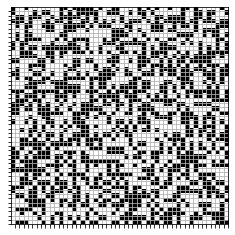

In [2]:
np.random.seed(0)
init_state = State(atm.get_random_state((50, 50)), Rules.CONWAY)
#print(init_state)
ans.plot_state(init_state.values)

In [7]:
action_func = lambda state: np.append(np.arange(state.shape[0]*state.shape[1])[state.flat == 0], [-1])
reward_func = lambda state: stats.get_total_alive(state.values)

In [12]:
from tqdm.notebook import tqdm, trange

In [13]:
def run(init_state, action_func, reward_func, episode_length = 10, num_training = 100, num_testing = 100):
    agent = QLearningAgent(action_func = action_func, reward_func = reward_func, num_training = num_training)
    
    state = init_state.copy()
    
    train_rewards = []
    test_rewards = []
    
    pbar = tqdm(total = agent.num_training + num_testing)
    while agent.episodes_so_far < agent.num_training + num_testing:
        
        agent.start_episode()
        for i in range(episode_length):
            _ = agent.observe_function(state)
            
            action = agent.get_action(state)
            agent.do_action(state, action)
            
            state = state.get_successor(action)
        
        agent.stop_episode()
        
        if agent.is_in_training():
            train_rewards += [agent.accum_train_rewards]
        else:
            test_rewards += [agent.accum_test_rewards]
            
        pbar.update(1)
    pbar.close()
    
    
    plt.plot(np.arange(agent.num_training-1), train_rewards)
    plt.plot(np.arange(agent.num_training, agent.num_training + num_testing + 1), test_rewards)
    plt.show()
    
    
    return agent

- why are delta rewards for training so negative?
    - the reward func for a CA changes rapidly and dramatically, so not unlikely for this to happen
    - it is implemented correctly
- funcs to save and reload agents fromn file
- converting this to a web server that we can usye to trck training/testing and easilty plot out
    - want to be able to queue different training based on different hyper parameters
- we need to define a better reward function for detecting cycles

- update the shit out of the readme

In [ ]:
agent = run(init_state, action_func, reward_func, num_training = 1000, num_testing = 500)

  0%|          | 0/1500 [00:00<?, ?it/s]

In [3]:
states = sim.play(init_state.values, steps = 100)

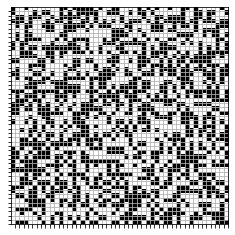

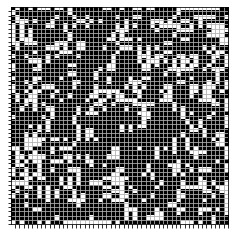

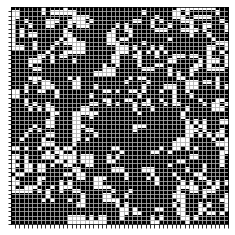

In [7]:
ans.plot_state(states[0])
ans.plot_state(states[1])
ans.plot_state(states[2])

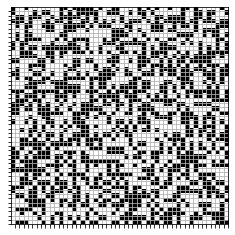

In [8]:
ans.plot_state(init_state.values)